In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
df = pd.read_csv("titanic_train.csv")

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


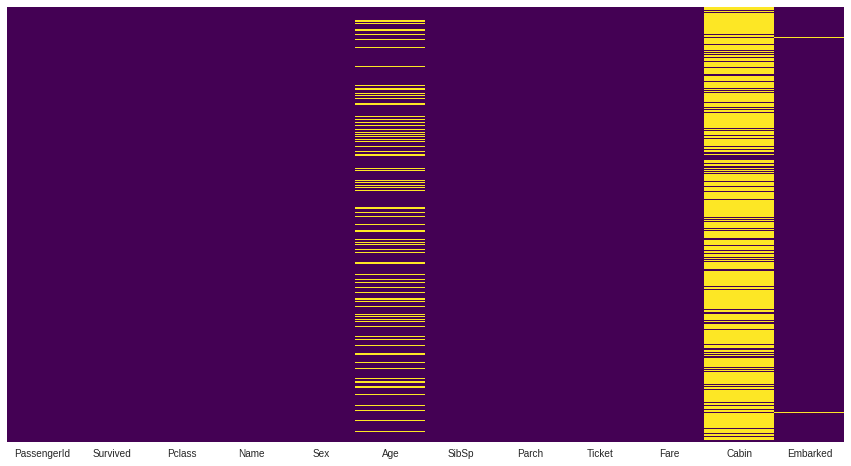

In [33]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [34]:
sns.set_style('whitegrid')

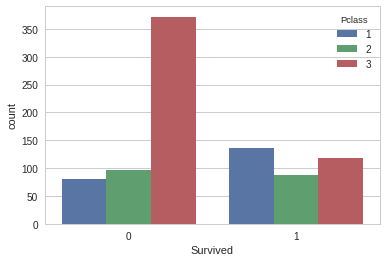

In [35]:
sns.countplot(x='Survived', data=df, hue='Pclass')

/home/casper/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


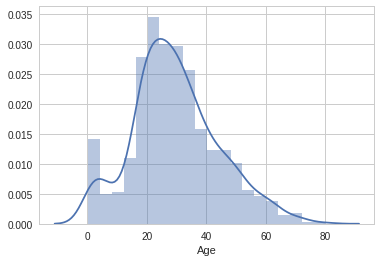

In [36]:
sns.distplot(df['Age'].dropna())

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


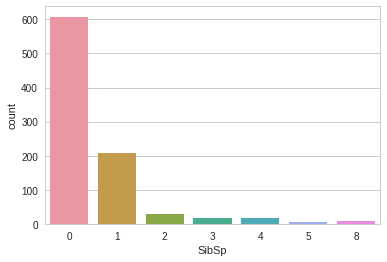

In [38]:
sns.countplot(x='SibSp', data=df)

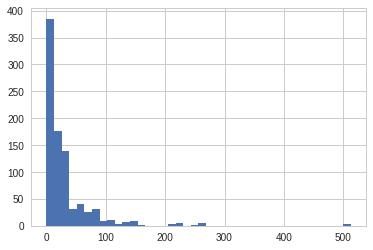

In [39]:
df['Fare'].hist(bins=40)

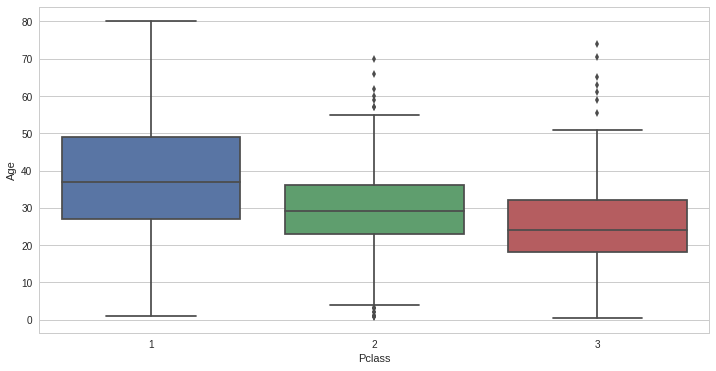

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass', y='Age', data=df)

In [41]:
def inpute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else: return 24
    else: return Age

In [42]:
df['Age']=df[['Age','Pclass']].apply(inpute_age, axis=1)

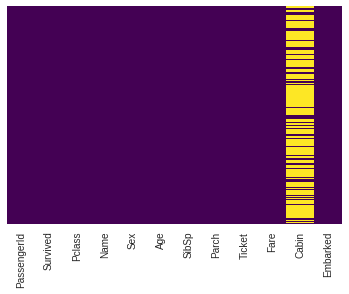

In [43]:
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [44]:
df.drop('Cabin', axis=1, inplace=True)

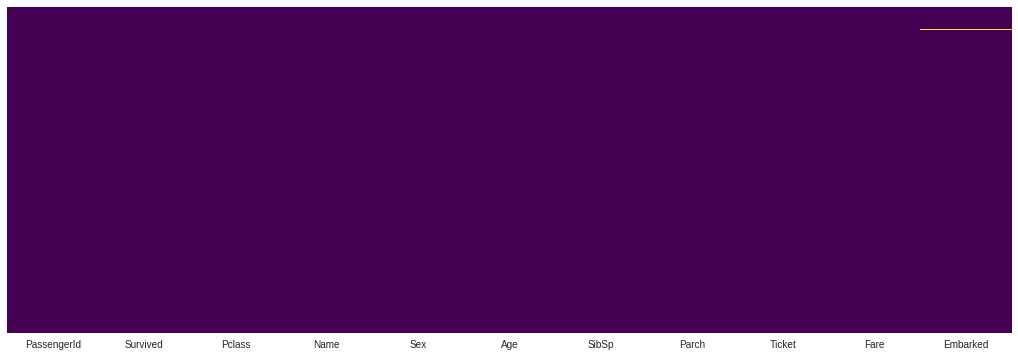

In [45]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [46]:
df.dropna(inplace=True)

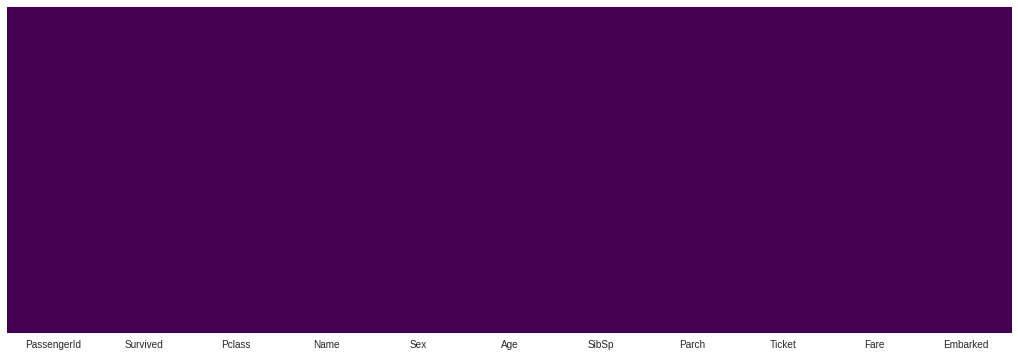

In [47]:
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull(),cbar=False, yticklabels=False, cmap='viridis')

In [48]:
df['Male'] = pd.get_dummies(df['Sex'], drop_first=True)

In [49]:
embarked = pd.get_dummies(df['Embarked'], drop_first=True)

In [51]:
df = pd.concat([df, embarked], axis=1)

In [52]:
df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [149]:
pclass = pd.get_dummies(df['Pclass'], drop_first=True)

In [154]:
train_with_categories = pd.concat([df, pclass], axis=1)
train_with_categories.drop('Pclass', axis=1, inplace=True)

In [148]:
train_with_cont_var = df

In [156]:
X = train_with_cont_var.drop('Survived', axis=1)
y = train_with_cont_var['Survived']

In [157]:
from sklearn.model_selection import train_test_split

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [160]:
from sklearn.linear_model import LogisticRegression

In [161]:
logmodel = LogisticRegression()

In [162]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [163]:
predictions = logmodel.predict(X_test)